量化分析师的Python日记【第8天 Q Quant兵器谱之函数插值】

In [1]:
from scipy import interpolate
dir(interpolate)[:5]

['Akima1DInterpolator',
 'BPoly',
 'BSpline',
 'BarycentricInterpolator',
 'BivariateSpline']

AttributeError: module 'scipy.interpolate' has no attribute 'spline'

In [9]:
import datetime
import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,>.2f}'.format
#dates = pd.to_datetime(['2015,3,25', '2015,4,25', '2015,6,25', '2015,9,25'])

dates = pd.to_datetime([datetime.datetime(2015,3,25),datetime.datetime(2015,4,25),datetime.datetime(2015,6,25),datetime.datetime(2015,9,25)])


strikes = [2.2, 2.3, 2.4, 2.5, 2.6]
blackVolMatrix = np.array([[ 0.32562851,  0.29746885,  0.29260648,  0.27679993],
                  [ 0.28841840,  0.29196629,  0.27385023,  0.26511898],
                  [ 0.27659511,  0.27350773,  0.25887604,  0.25283775],
                  [ 0.26969754,  0.25565971,  0.25803327,  0.25407669],
                  [ 0.27773032,  0.24823248,  0.27340796,  0.24814975]])
table = pd.DataFrame(blackVolMatrix * 100, index = strikes, columns = dates, )
table.index.name = u'行权价'
table.columns.name = u'到期时间'
print (u'2015年3月3日10时波动率矩阵')
table

2015年3月3日10时波动率矩阵


到期时间,2015-03-25,2015-04-25,2015-06-25,2015-09-25
行权价,,,,
2.20,32.56,29.75,29.26,27.68
2.30,28.84,29.20,27.39,26.51
2.40,27.66,27.35,25.89,25.28
2.50,26.97,25.57,25.80,25.41
2.60,27.77,24.82,27.34,24.81


2.1 方差曲面插值

In [31]:
evaluationDate = pd.to_datetime(datetime.datetime(2015,3,3))
ttm = np.array([(d - evaluationDate).days / 365.0 for d in dates])
varianceMatrix = (blackVolMatrix**2) * ttm
varianceMatrix

array([[0.00639109, 0.0128489 , 0.02674114, 0.04324205],
       [0.0050139 , 0.01237794, 0.02342277, 0.03966943],
       [0.00461125, 0.01086231, 0.02093128, 0.03607931],
       [0.00438413, 0.0094909 , 0.02079521, 0.03643376],
       [0.00464918, 0.00894747, 0.02334717, 0.03475378]])

In [32]:
interp = interpolate.interp2d(ttm, strikes, varianceMatrix, kind = 'linear')

In [33]:
interp(ttm[0], strikes[0])

array([0.00639109])

In [34]:
sMeshes = np.linspace(strikes[0], strikes[-1], 400)
tMeshes = np.linspace(ttm[0], ttm[-1], 200)
interpolatedVarianceSurface = np.zeros((len(sMeshes), len(tMeshes)))
for i, s in enumerate(sMeshes):
    for j, t in enumerate(tMeshes):
        interpolatedVarianceSurface[i][j] = interp(t,s)

interpolatedVolatilitySurface = np.sqrt((interpolatedVarianceSurface / tMeshes))
print (u'行权价方向网格数：', np.size(interpolatedVolatilitySurface, 0))
print (u'到期时间方向网格数：', np.size(interpolatedVolatilitySurface, 1))

行权价方向网格数： 400
到期时间方向网格数： 200


Text(0.5, 1.0, '到期时间为2015年3月25日期权波动率')

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21040 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26399 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 38388 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 20026 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current

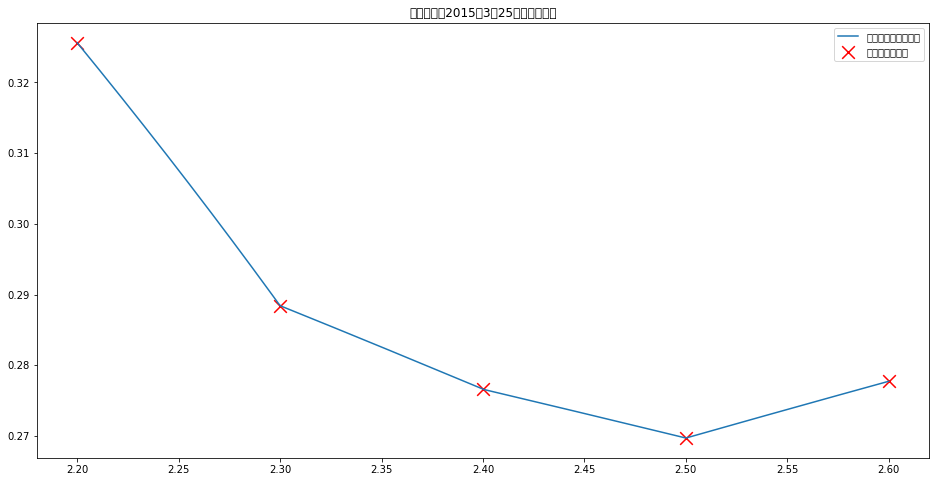

In [39]:
from matplotlib import pylab
pylab.figure(figsize = (16,8))
pylab.plot(sMeshes, interpolatedVolatilitySurface[:, 0])
pylab.scatter(x = strikes, y = blackVolMatrix[:,0], s = 160,marker = 'x', color = 'r')
pylab.legend([u'波动率（线性插值）', u'波动率（离散）'])
pylab.title(u'到期时间为2015年3月25日期权波动率')

Text(0.5, 0, 'volatility(%)')

C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 24180 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26085 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 26102 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 27874 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Acer\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 21160 missing from current

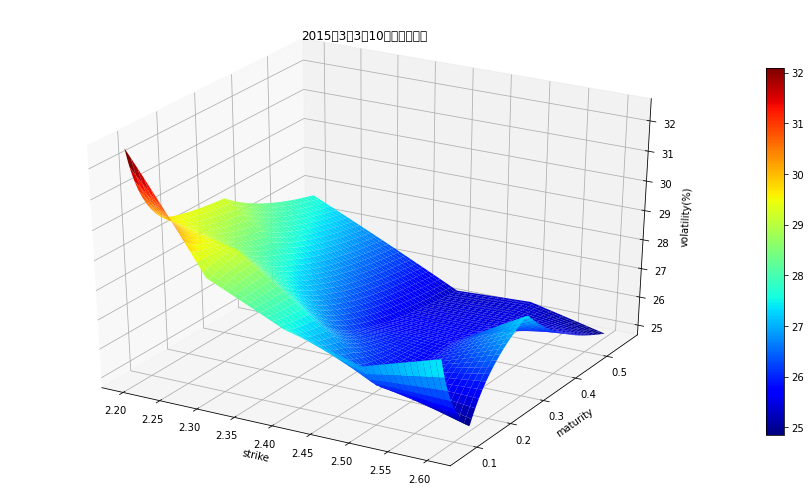

In [38]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

maturityMesher, strikeMesher = np.meshgrid(tMeshes, sMeshes)
pylab.figure(figsize = (16,9))
ax = pylab.gca(projection = '3d')
surface = ax.plot_surface(strikeMesher, maturityMesher, interpolatedVolatilitySurface*100, cmap = cm.jet)
pylab.colorbar(surface,shrink=0.75)
pylab.title(u'2015年3月3日10时波动率曲面')
pylab.xlabel("strike")
pylab.ylabel("maturity")
ax.set_zlabel(r"volatility(%)")
